# UFO Analysis

## Abstract

The goal of this project is to explore the UFO data across US states and to get some meaningful insights.

For this project we will be working with **Kaggle's UFO Sightings** dataset- https://www.kaggle.com/NUFORC/ufo-sightings

Following questions will be answered-
* When and where do people see UFOs in California?
* What is the average length of UFO sightings across the U.S. states?
* Differences in the circumstances of UFO sightings across the U.S. states?

#### To enable multiple output

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [1]:
import pandas as pd

## Reading the UFO Data and Cleaning

In [2]:
df=pd.read_csv('scrubbed.csv', low_memory=False)
df.head(2)

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082


#### Column renaming to make it more user-friendly

In [3]:
df=df.rename(columns={'datetime':'sighted_on', 'duration (seconds)':'duration_s', 
                      'duration (hours/min)':'duration_hm','date posted':'posted_on'})

In [4]:
df=df.set_index('sighted_on')

#### Preprocessing data by transforming the columns 

In [5]:
df['city']=df['city'].str.title()
df['state']=df['state'].str.upper()
df['country']=df['country'].str.upper()

#### Transforming into numeric value 

In [6]:
df['latitude'] = pd.to_numeric(df['latitude'],errors='coerce')
df['duration_s'] = pd.to_numeric(df['duration_s'],errors='coerce')

#### Filtering for country US

In [7]:
df=df[df['country']=='US']

## Sighting in California at various times

In [8]:
Sighting_Cal=df[df['state']=='CA']
Sighting_Cal.head(5)

,city,state,country,shape,duration_s,duration_hm,comments,posted_on,latitude,longitude
sighted_on,,,,,,,,,,
10/10/1968 13:00,Hawthorne,CA,US,circle,300.0,5 min.,ROUND &#44 ORANGE &#44 WITH WHAT I WOULD SAY W...,10/31/2003,33.916389,-118.351667
10/10/1979 22:00,San Diego,CA,US,oval,180.0,3 minutes,My 2nd UFO sighting&#44 October 1979,8/5/2001,32.715278,-117.156389
10/10/1989 00:00,Calabasas,CA,US,disk,300.0,approx 5 min,Unidentified object on Mulholland Highway.,12/14/2004,34.157778,-118.637500
10/10/1995 22:40,Oakland,CA,US,NaN,60.0,1 minute,Woman repts. bright light in NW sky&#44 sudde...,11/2/1999,37.804444,-122.269722
10/10/1998 02:30,Hollywood,CA,US,changing,300.0,5 minutes,I was standing outside on Sunset Blvd. at Vine...,11/1/1998,34.098333,-118.325833


Populating the interactive namespace from numpy and matplotlib


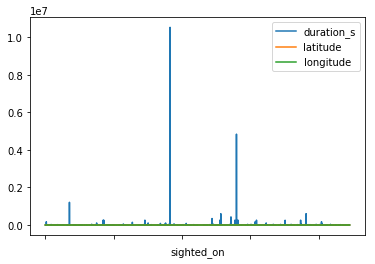

In [9]:
%pylab inline
Sighting_Cal.plot()

## Average length of UFO sightings across the U.S. states

#### Calculating the average sighting time

In [10]:
time=df['duration_s'].mean()
print("Average sighting time is %2f seconds" % time)

Average sighting time is 5800.192049 seconds


#### Average sighting duration in the format of Days:Hours:Minutes:Seconds

In [11]:
day = time // (24 * 3600)
time = time % (24 * 3600)
hour = time // 3600
time %= 3600
minutes = time // 60
time %= 60
seconds = time
print("d:h:m:s-> %d:%d:%d:%d" % (day, hour, minutes, seconds))

d:h:m:s-> 0:1:36:40


#### Calculating the average sighting time across US states

In [12]:
df.groupby('state')['duration_s'].mean()

state
AK      4615.752351
AL      1411.538162
AR    113930.296769
AZ      6425.574637
CA      3381.238298
CO      3087.327035
CT     14132.476233
DC       235.071429
DE       882.948795
FL     14593.241199
GA      7600.329163
HI     25708.198473
IA       936.699115
ID       929.029367
IL       883.122877
IN      3272.908929
KS      1393.358075
KY      4040.173684
LA     12254.166667
MA      1282.606688
MD       834.966906
ME      3357.985484
MI      3923.128050
MN      1382.596176
MO      1142.996433
MS      9064.805333
MT      2231.615063
NC      1186.240431
ND      1105.147287
NE      1096.501312
NH      2228.021605
NJ      6226.090837
NM      5699.346653
NV      3013.286364
NY      3003.656560
OH      1453.723429
OK      1181.098481
OR      1063.413440
PA      4120.428571
PR      1050.400000
RI      2080.186404
SC      1104.023729
SD      2626.795082
TN      1670.955585
TX      2463.959603
UT      5500.345659
VA     10712.976434
VT      1026.713462
WA     14470.397413
WI      2041.4

 #### Average sighting time across US states

Populating the interactive namespace from numpy and matplotlib


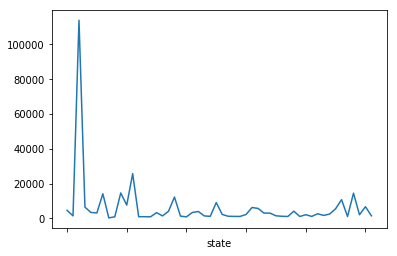

In [14]:
%pylab inline
df.groupby('state')['duration_s'].mean().plot()

## Analyzing UFO Sighting Comments

#### Writing comments in a text file

In [15]:
import codecs
file = codecs.open("comments.txt", "w")
for i in df.comments:
    file.write(str(i))
    file.write("\n")
file.close() 


#### Now we have generated a file containing comments for the further analysis.

## Pre-processing Comments

#### Importing required packages

In [16]:
import nltk
from nltk.corpus import stopwords # Import the stop word list
nltk.download("stopwords")
import sklearn 
import collections, re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\VershaDeota\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Cleaning the comments using regular expressions

In [17]:
def clean_comments(comment):
    #Convert to lower case
    comment = comment.lower()
    #Remove additional white spaces
    comment = re.sub('[\s]+', ' ', comment)
    #Replace #word with word
    comment = re.sub(r'#([^\s]+)', r'\1', comment)
    #Replace all non alphanumeric i.e remove all special characters
    comment=re.sub(r"\d*$", "", comment)
    comment=re.sub(r'[^\w]', ' ', comment)
    comment =re.sub("[.]", "", comment)
    #trim
    comment = comment.strip('\'"')
    #comment= comment.strip()
    comments_list=comment.split()
    return comments_list


#### Creating stopwords, positive and negative list of words

In [18]:
stop_words = list(stopwords.words('english'))

positive_words=open('PositiveWords.txt','r').read().split("\n")

negative_words=open('NegativeWords.txt','r').read().split("\n")

#### Cleaning the comment file and adding it in the list

In [19]:
import inflection  # it's a string transformation library.
final_comments=[]
#Read the file line by line
fp = open('comments.txt', 'r',encoding="utf8")
line = fp.readline()

while line:
    line = fp.readline()

    #Add the cleaned tweets to list
    clean_comment=clean_comments(line)
    
    #removing stopwords from the clean_tweets list
    for i in clean_comment:
        if i in stop_words:
            continue
        if i in positive_words:
            continue
        if i in negative_words:
            continue
        if len(i)<3:
            continue
        else:
            final_comments.append(inflection.singularize(i))    #To convert plural to singular word, like lights->light        
#end loop
fp.close()

## Finding the 10 most frequent words from comments

In [20]:
fdist = nltk.FreqDist(final_comments)
twenty_most_common=fdist.most_common(10)
twenty_most_common

[('light', 29599),
 ('sky', 14535),
 ('moving', 7613),
 ('orange', 7392),
 ('white', 6753),
 ('red', 6710),
 ('shaped', 5811),
 ('saw', 5543),
 ('craft', 4872),
 ('seen', 4613)]

#### Based on the word frequency in comments we can list the circumstances of UFO sightings across the U.S. states-

* People were mostly commenting about the lights they saw in the sky, of various colors mostly white, orange and red. 
* The object was moving. 
* People have commented about the different shape of the craft and UFO.